##Projeto de Análise de Redes
#Simulação da COVID-19 em Redes com o Modelo SEIR

Este projeto tem como objetivo realizar uma análise baseada em uma simulação da disseminação da COVID-19 utilizando o modelo SEIR, a partir da rede representada no dataset facebook_combined.txt, disponibilizado pelo repositório SNAP (Stanford Network Analysis Project), da Universidade de Stanford.

O dataset representa uma rede de amizades no Facebook, onde os nós correspondem aos usuários e as arestas indicam relações de amizade entre eles.

Para a análise da rede original, não foi necessário gerar um subgrafo, pois ela já é conectada. No entanto, ao longo do projeto, subgrafos foram utilizados nas etapas relacionadas à simulação com o modelo SEIR, a fim de facilitar análises específicas da propagação da doença.

##Etapa 1: Análise da Rede do Facebook
Inicialmente, serão instalados e importados todos os pacotes e bibliotecas necessários para o desenvolvimento do projeto. Em seguida, será realizada a criação do grafo a partir do dataset fornecido.

In [10]:
!pip install networkx matplotlib seaborn pyvis python-louvain ndlib

In [131]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter
import matplotlib.cm as cm
from collections import Counter, defaultdict
import community as community_louvain
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epidemics
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

url = 'https://raw.githubusercontent.com/AllaneE/Simula-o-da-COVID-19/refs/heads/main/facebook_combined.txt'
file_name = 'facebook_combined.txt'

# Download the file
!wget {url} -O {file_name}

# Read the edgelist from the downloaded file
G = nx.read_edgelist(file_name, nodetype=int)

--2025-07-20 01:18:05--  https://raw.githubusercontent.com/AllaneE/Simula-o-da-COVID-19/refs/heads/main/facebook_combined.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 854362 (834K) [text/plain]
Saving to: ‘facebook_combined.txt’

facebook_combined.t 100%[===================>] 834.34K  --.-KB/s    in 0.02s   

2025-07-20 01:18:05 (39.4 MB/s) - ‘facebook_combined.txt’ saved [854362/854362]



### Cálculo das Métricas da Rede
Agora que temos o grafo, vamos calcular as principais métricas estruturais da rede.




In [132]:
print("-- Métricas do Grafo Facebook --")
print("Número de nós:", G.number_of_nodes())
print("Número de arestas:", G.number_of_edges())
print("O grafo é conectado?", nx.is_connected(G))
print("Densidade da rede:", nx.density(G))
print("Assortatividade:", nx.degree_assortativity_coefficient(G))
print("Diâmetro: ", nx.diameter(G))
print("Periferia:", nx.periphery(G))
print("------------------------------")

-- Métricas do Grafo Facebook --
Número de nós: 4039
Número de arestas: 88234
O grafo é conectado? True
Densidade da rede: 0.010819963503439287
Assortatividade: 0.06357722918564943
Diâmetro:  8
Periferia: [687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 699, 700, 701, 702, 704, 705, 706, 707, 709, 710, 711, 712, 714, 715, 716, 717, 718, 720, 721, 722, 723, 724, 725, 726, 727, 728, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 746, 748, 749, 750, 751, 752, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 770, 771, 773, 775, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 799, 801, 802, 806, 807, 808, 809, 812, 813, 814, 815, 816, 817, 818, 820, 821, 822, 824, 826, 827, 829, 831, 832, 833, 834, 835, 836, 837, 838, 839, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3990, 3991, 3992, 3993, 3994, 3995, 


* **Densidade:** Indica o quão conectada é a rede. O valor baixo mostra que ela é esparsa, com muitas conexões possíveis não realizadas.

* **Assortatividade:** Mostra se nós com graus semelhantes tendem a se conectar. O valor positivo indica essa tendência.

* **Diâmetro:** A maior distância entre dois nós da rede é 8, o que sugere uma rede relativamente compacta.

* **Periferia:** Conjunto de nós mais distantes dos demais, geralmente localizados nas bordas da rede.


###Matriz de Adjacência
A matriz de adjacência do grafo foi obtida utilizando a função `nx.adjacency_matrix()`. Ela representa as conexões entre os nós da rede, onde cada elemento indica a presença (1) ou ausência (0) de uma aresta entre pares de nós.

In [133]:
adj_matrix = nx.adjacency_matrix(G).todense()
print("-- Matriz de adjacência --")
print(adj_matrix)

-- Matriz de adjacência --
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


###Histograma da Distribuição de Grau
O código abaixo gera um histograma que representa a distribuição dos graus dos nós na rede. Essa visualização permite observar como os graus estão distribuídos e identificar características como a presença de poucos nós com grau muito alto.

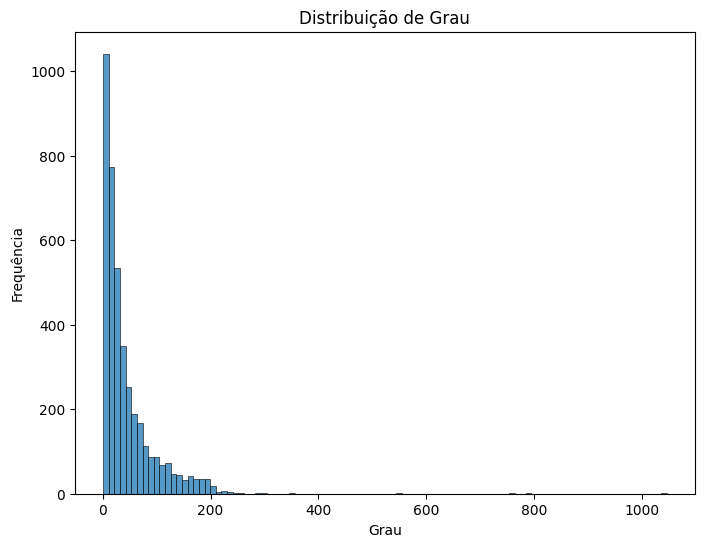

In [134]:
%matplotlib inline
degree = [d for n, d in G.degree()]
plt.figure(figsize=(8, 6))
sns.histplot(degree,bins = 100, kde=False)
plt.title('Distribuição de Grau')
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.show()

###Coeficiente de Clustering e Centralidades


#### Clustering
O coeficiente de clustering mede a tendência dos vizinhos de um nó estarem conectados entre si. Em outras palavras, "o amigo do meu amigo também é meu amigo".


In [135]:
print("-- Coeficiente de Clustering e Centralidades --")
print("Clustering Global:", nx.average_clustering(G))
for node in list(G.nodes())[:5]:
    print("Clustering Local do nó", node,":", nx.clustering(G, node))
print("----------------------------------------------")

-- Coeficiente de Clustering e Centralidades --
Clustering Global: 0.6055467186200876
Clustering Local do nó 0 : 0.04196165314587463
Clustering Local do nó 1 : 0.41911764705882354
Clustering Local do nó 2 : 0.8888888888888888
Clustering Local do nó 3 : 0.6323529411764706
Clustering Local do nó 4 : 0.8666666666666667
----------------------------------------------


#### Centralidades

* **Degree centrality:** nós com mais conexões.

* **Eigenvector centrality:** nós conectados a outros nós importantes.

* **Closeness centrality:** nós mais próximos de todos os outros (centralidade de proximidade).

* **Betweenness centrality:** nós que atuam como "pontes" no caminho de outras conexões.



In [136]:
deg_cent = nx.degree_centrality(G)
eig_cent = nx.eigenvector_centrality(G)
close_cent = nx.closeness_centrality(G)
betw_cent = nx.betweenness_centrality(G)

# Exibir os top 5 para cada
print("Top 5 Degree Centrality:")
for node, centrality in sorted(deg_cent.items(), key=itemgetter(1), reverse=True)[:5]:
    print(f"Node {node}: {centrality}")

print("\nTop 5 Eigenvector Centrality:")
for node, centrality in sorted(eig_cent.items(), key=itemgetter(1), reverse=True)[:5]:
    print(f"Node {node}: {centrality}")

print("\nTop 5 Closeness Centrality:")
for node, centrality in sorted(close_cent.items(), key=itemgetter(1), reverse=True)[:5]:
    print(f"Node {node}: {centrality}")

print("\nTop 5 Betweenness Centrality:")
for node, centrality in sorted(betw_cent.items(), key=itemgetter(1), reverse=True)[:5]:
    print(f"Node {node}: {centrality}")

Top 5 Degree Centrality:
Node 107: 0.258791480931154
Node 1684: 0.1961367013372957
Node 1912: 0.18697374938088163
Node 3437: 0.13546310054482416
Node 0: 0.08593363051015354

Top 5 Eigenvector Centrality:
Node 1912: 0.09540696149067629
Node 2266: 0.08698327767886552
Node 2206: 0.08605239270584342
Node 2233: 0.08517340912756598
Node 2464: 0.08427877475676092

Top 5 Closeness Centrality:
Node 107: 0.45969945355191255
Node 58: 0.3974018305284913
Node 428: 0.3948371956585509
Node 563: 0.3939127889961955
Node 1684: 0.39360561458231796

Top 5 Betweenness Centrality:
Node 107: 0.4805180785560152
Node 1684: 0.3377974497301992
Node 3437: 0.23611535735892905
Node 1912: 0.2292953395868782
Node 1085: 0.14901509211665306


###Comunidades
Atraves do algoritmo de Louvain vamos identificar grupos de nós densamente conectados entre si, mais do que o resto do grafo.

In [139]:
print("-- Comunidades --")
comunidades_G  = community_louvain.best_partition(G)
print("Número de Comunidades:", len(set(comunidades_G.values())))

cont_comunidades = Counter(comunidades_G.values())
print("Número de nós por comunidade:")
for comunidade, quantidade in cont_comunidades.items():
    print(f"Comunidade {comunidade}: {quantidade} nós")
print("------------------------------")

-- Comunidades --
Número de Comunidades: 17
Número de nós por comunidade:
Comunidade 0: 341 nós
Comunidade 1: 433 nós
Comunidade 2: 60 nós
Comunidade 8: 442 nós
Comunidade 4: 423 nós
Comunidade 5: 535 nós
Comunidade 6: 321 nós
Comunidade 7: 71 nós
Comunidade 15: 548 nós
Comunidade 10: 73 nós
Comunidade 11: 237 nós
Comunidade 12: 25 nós
Comunidade 13: 60 nós
Comunidade 14: 206 nós
Comunidade 16: 226 nós
Comunidade 9: 19 nós
Comunidade 3: 19 nós
------------------------------


## Etapa 2: Análise da rede com SEIR
O modelo SEIR é amplamente utilizado para simular a propagação de doenças infecciosas em populações. Ele classifica os indivíduos em quatro categorias, de acordo com o estágio da doença:

* **Suscetíveis (S):** Indivíduos saudáveis que ainda não foram infectados, mas que estão vulneráveis à infecção.

* **Expostos (E):** Indivíduos que foram infectados, mas ainda estão no período de incubação. Nesse estágio, não apresentam sintomas nem transmitem a doença.

* **Infectados (I):** Indivíduos que desenvolveram a doença e são capazes de transmiti-la a outros.

* **Removidos (R):** Indivíduos que não participam mais da cadeia de transmissão, seja porque se recuperaram ou porque foram a óbito.

Este modelo foi adotado por ser especialmente adequado à dinâmica da COVID-19, pois considera tanto o período de incubação quanto a capacidade de transmissão do vírus, elementos fundamentais para representar com precisão o comportamento da doença.

Os parâmetros adotados para a analise foram:


*  **β:** 0,3
* ** α:** 0,22
* ** γ:** 0,1
*   **`fraction_infected`:** 0,001



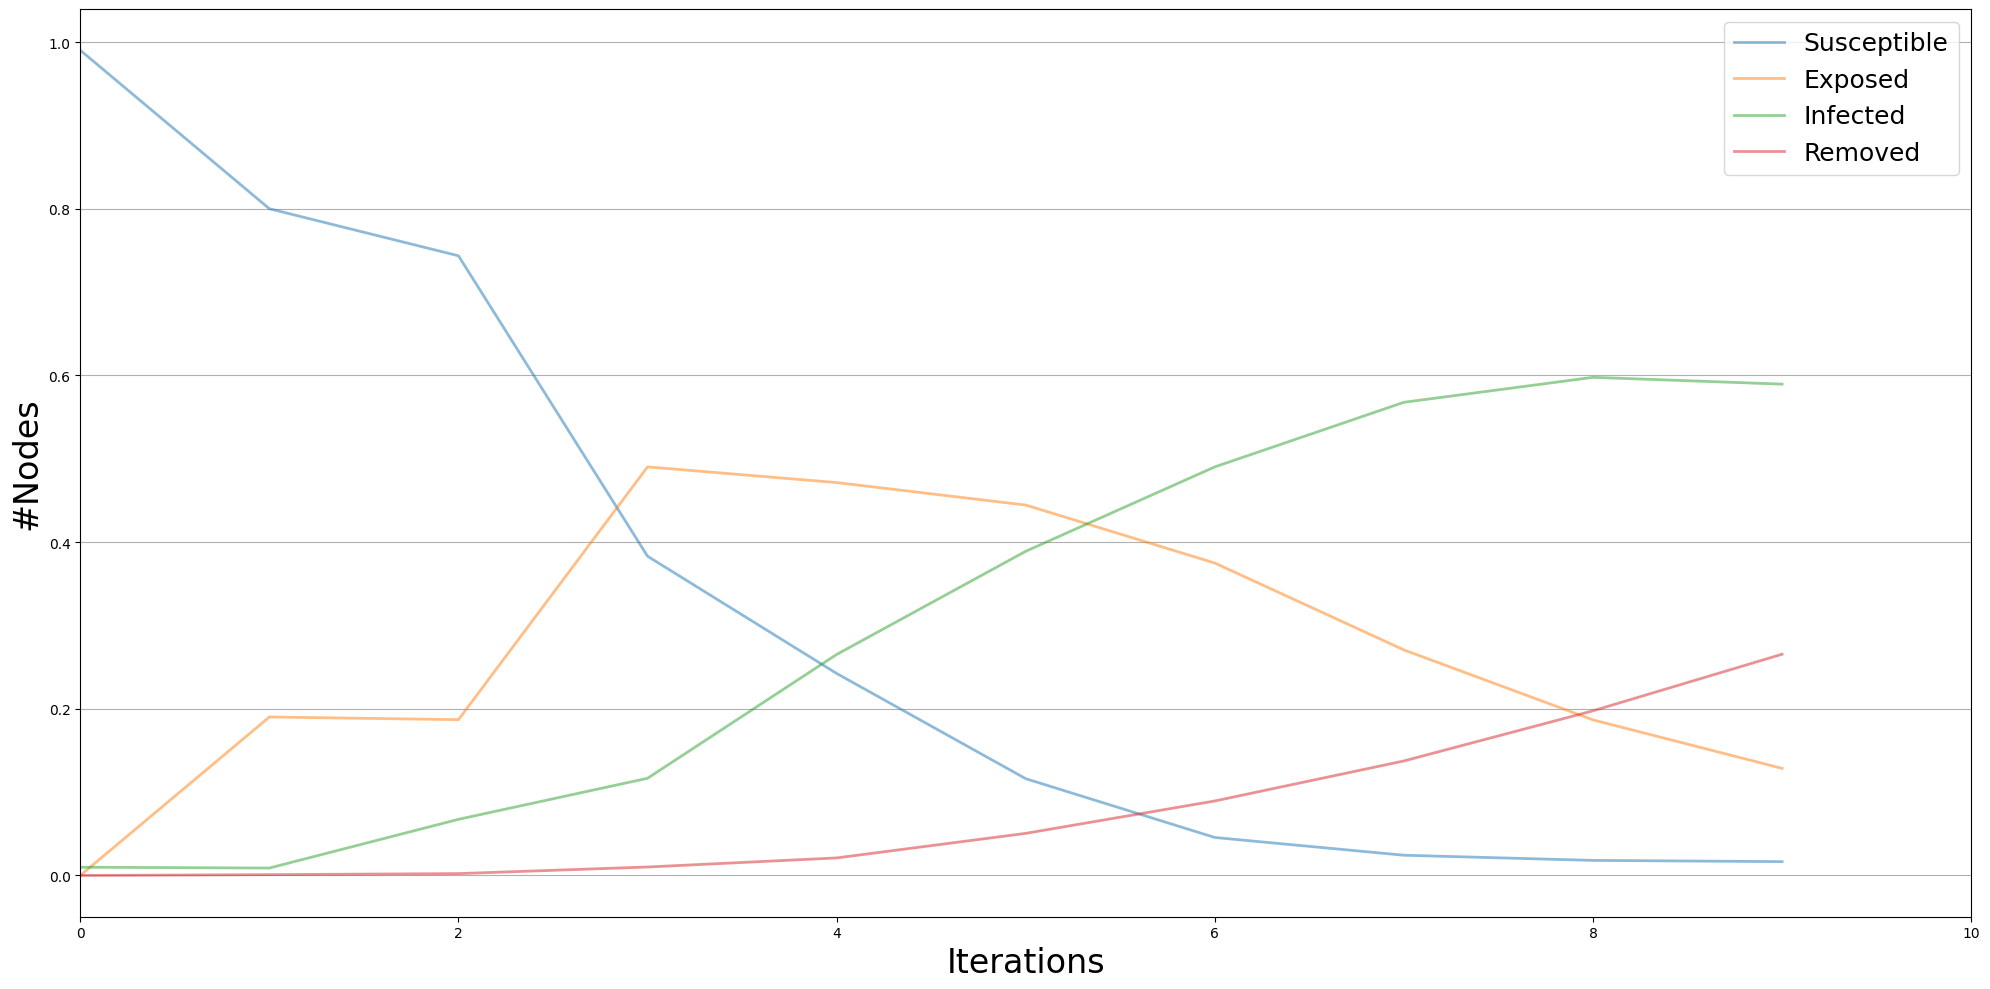


-- Resultados finais da simulação SEIR --
Susceptíveis: 67
Expostos:     2381
Infectados:   519
Removidos:    1072
------------------------------------------


In [140]:
%matplotlib inline

G_sim = G.copy()
model = epidemics.SEIRModel(G_sim)
config = mc.Configuration()

config.add_model_parameter('beta', 0.6)     # Probabilidade de infecção (S → E)
config.add_model_parameter('alpha', 0.33)    # Exposto vira infectado (E → I)
config.add_model_parameter('gamma', 0.1)    # Infectado vira removido (I → R)
config.add_model_parameter("fraction_infected", 0.01)  # 1% dos nós começa infectado

model.set_initial_status(config)
interations = model.iteration_bunch(10, node_status=True)
trends = model.build_trends(interations)
viz = DiffusionTrend(model, trends)
viz.plot()

final_status = model.status
count_final = Counter(final_status.values())

print("\n-- Resultados finais da simulação SEIR --")
print(f"Susceptíveis: {count_final.get(0, 0)}")
print(f"Expostos:     {count_final.get(1, 0)}")
print(f"Infectados:   {count_final.get(2, 0)}")
print(f"Removidos:    {count_final.get(3, 0)}")
print("------------------------------------------")

###Comparação entre a Rede Inicial e a Rede Ativa Pós-Simulação
Após a execução do modelo SEIR, podemos comparar a rede original com a rede composta apenas pelos nós ativos, ou seja, os nós que não foram removidos.

Nota que, há uma tendência de redução no número de nós e na densidade da rede após a simulação. Isso ocorre porque, à medida que o modelo avança, os indivíduos nos estados 'Recuperado' ou 'Removido' são considerados inativos e, portanto, excluídos da análise da rede ativa. Com menos nós participando das interações e, consequentemente, menos conexões entre eles, a densidade da rede tende a diminuir.

In [141]:
nos_ativos = [n for n, s in model.status.items() if s in (0, 1, 2)]
G_ativo = G_sim.subgraph(nos_ativos)

print("-- Rede original --")
print("Número de nós:", G.number_of_nodes())
print("Número de arestas:", G.number_of_edges())
print("Densidade da rede:", nx.density(G))
print("------------------")

print("-- Rede ativa --")
print("Número de nós ativos:", G_ativo.number_of_nodes())
print("Número de arestas ativos:", G_ativo.number_of_edges())
print("Densidade da rede:", nx.density(G_ativo))
print("------------------")

-- Rede original --
Número de nós: 4039
Número de arestas: 88234
Densidade da rede: 0.010819963503439287
------------------
-- Rede ativa --
Número de nós ativos: 2967
Número de arestas ativos: 41472
Densidade da rede: 0.009425323876191716
------------------


### Métricas para cada estado
Conforme discutido anteriormente, aplicaremos agora as métricas de análise de redes aos subgrafos correspondentes a cada estado do modelo SEIR. Para isso, separamos os nós da rede final de acordo com seus estados:

In [143]:
def analise_redes(G_sub, nome):
  print("=================================")
  print("Análise da rede", nome)
  print("Número de nós:", G_sub.number_of_nodes())
  print("Número de arestas:", G_sub.number_of_edges())
  print("O grafo é conectado?", nx.is_connected(G_sub))
  print("Densidade da rede:", nx.density(G_sub))
  print("Assortatividade:", nx.degree_assortativity_coefficient(G_sub))

In [144]:
nos_suscetiveis = [n for n in G_sim.nodes() if final_status[n] == 0]
nos_exposto = [n for n in G_sim.nodes() if final_status[n] == 1]
nos_infectados = [n for n in G_sim.nodes() if final_status[n] == 2]
nos_removidos = [n for n in G_sim.nodes() if final_status[n] == 3]

G_s = G_sim.subgraph(nos_suscetiveis)
G_e = G_sim.subgraph(nos_exposto)
G_i = G_sim.subgraph(nos_infectados)
G_r = G_sim.subgraph(nos_removidos)

analise_redes(G_s, "Suscetíveis")
analise_redes(G_e, "Expostos")
analise_redes(G_i, "Infectados")
analise_redes(G_r, "Removidos")

Análise da rede Suscetíveis
Número de nós: 67
Número de arestas: 122
O grafo é conectado? False
Densidade da rede: 0.055178652193577565
Assortatividade: 0.18225807016744697
Análise da rede Expostos
Número de nós: 2381
Número de arestas: 31297
O grafo é conectado? False
Densidade da rede: 0.011045779084418311
Assortatividade: 0.04762226371471804
Análise da rede Infectados
Número de nós: 519
Número de arestas: 767
O grafo é conectado? False
Densidade da rede: 0.005705953682832296
Assortatividade: 0.5317748162349725
Análise da rede Removidos
Número de nós: 1072
Número de arestas: 9136
O grafo é conectado? False
Densidade da rede: 0.015914823640899144
Assortatividade: 0.14145379017909393


### Centralidades médias pós-simulação
Vamos comparar as centralidades médias da rede completa com as centralidades médias apenas dos nós que foram infectados no final da simulação.

In [145]:
infectados_final = set(nos_infectados)
suscetiveis_final = set(nos_suscetiveis)

degree_centrality_ep = nx.degree_centrality(G_sim)
betweenness_centrality_ep = nx.betweenness_centrality(G_sim)
closeness_centrality_ep = nx.closeness_centrality(G_sim)

media_deg = np.mean(list(degree_centrality_ep.values()))
media_betw = np.mean(list(betweenness_centrality_ep.values()))
media_close = np.mean(list(closeness_centrality_ep.values()))

media_deg_infectados = np.mean([degree_centrality_ep[node] for node in nos_infectados])
media_betw_infectados = np.mean([betweenness_centrality_ep[node] for node in nos_infectados])
media_close_infectados = np.mean([closeness_centrality_ep[node] for node in nos_infectados])

print(f"Média grau total: {media_deg:.4f} | Infectados: {media_deg_infectados:.4f}")
print(f"Média betweenness total: {media_betw:.4f} | Infectados: {media_betw_infectados:.4f}")
print(f"Média closeness total: {media_close:.4f} | Infectados: {media_close_infectados:.4f}")

Média grau total: 0.0108 | Infectados: 0.0073
Média betweenness total: 0.0007 | Infectados: 0.0001
Média closeness total: 0.2762 | Infectados: 0.2699


Com base nos valores obtidos das métricas de centralidade, podemos concluir que a epidemia, nesse experimento, se espalhou predominantemente entre nós menos centrais, ou seja, nós que possuem menor influência estrutural na rede.

Vale ressaltar, entretanto, que esse comportamento pode variar conforme as condições e a variância inerente às simulações realizadas, incluindo a escolha dos parâmetros e a topologia inicial da rede.

### Comunidades no grafo pós-simulação
Após a simulação da propagação da epidemia, aplicamos o algoritmo de Louvain para identificar comunidades na rede.

-- Comunidades --
Número de Comunidades: 16
Número de nós por comunidade:
Comunidade 0: 350 nós
Comunidade 1: 433 nós
Comunidade 2: 447 nós
Comunidade 3: 423 nós
Comunidade 4: 535 nós
Comunidade 5: 323 nós
Comunidade 6: 116 nós
Comunidade 12: 548 nós
Comunidade 9: 73 nós
Comunidade 10: 237 nós
Comunidade 11: 25 nós
Comunidade 13: 59 nós
Comunidade 14: 206 nós
Comunidade 15: 226 nós
Comunidade 8: 19 nós
Comunidade 7: 19 nós
--------------------------------


/tmp/ipython-input-152-44362371.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('twilight', max(comunidades_final.values()) + 1)


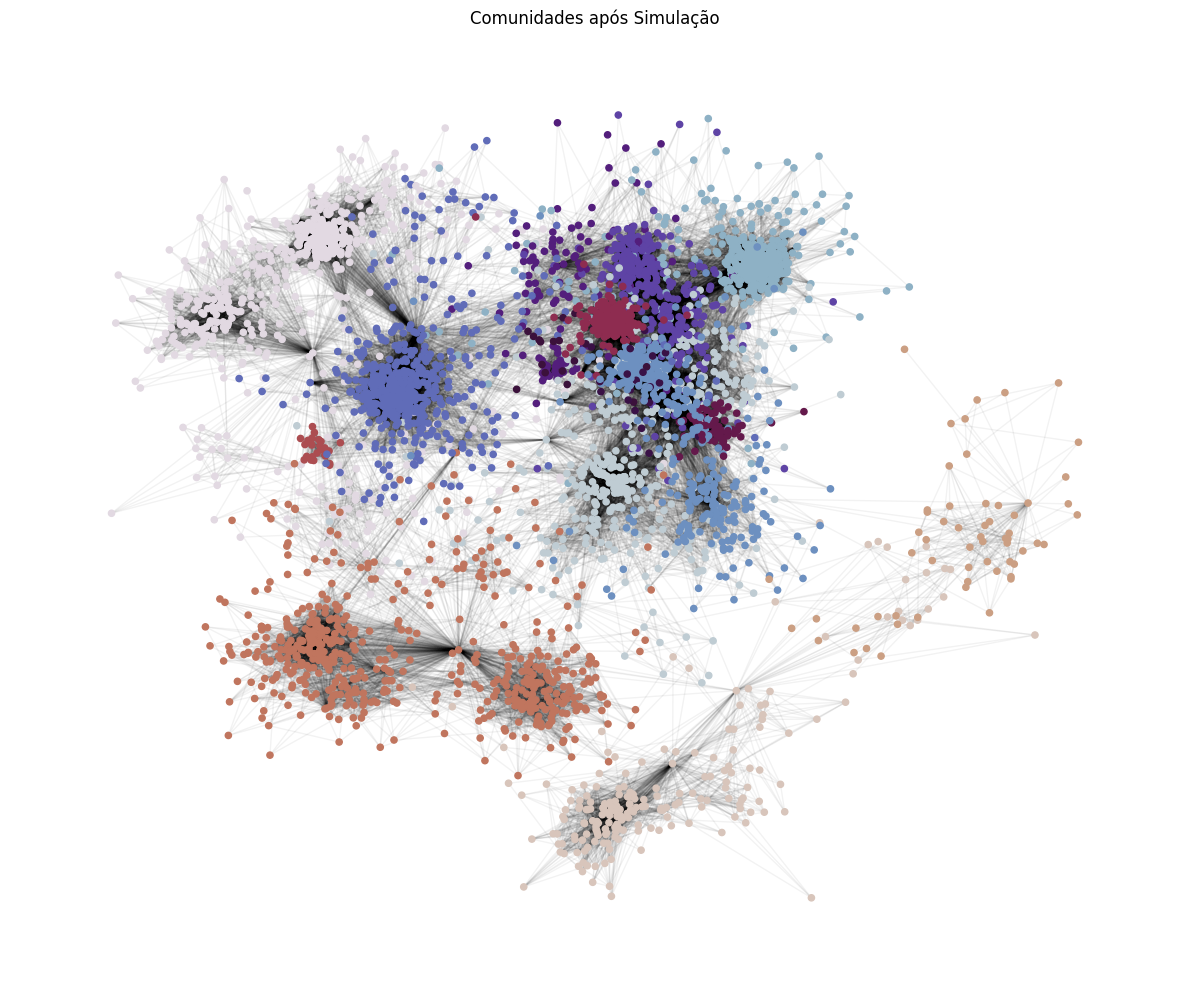

In [152]:
comunidades_final = community_louvain.best_partition(G_sim)
cont_comunidades_final = Counter(comunidades_final.values())

print("-- Comunidades --")
print("Número de Comunidades:", len(set(comunidades_final.values())))
print("Número de nós por comunidade:")
for comunidade, quantidade in cont_comunidades_final.items():
    print(f"Comunidade {comunidade}: {quantidade} nós")
print("--------------------------------")

pos = nx.spring_layout(G_sim, seed=42)
cmap = cm.get_cmap('twilight', max(comunidades_final.values()) + 1)

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(
    G_sim,
    pos,
    node_size=20,
    node_color=list(comunidades_final.values()),
    cmap=cmap
)
nx.draw_networkx_edges(G_sim, pos, alpha=0.05)
plt.title("Comunidades após Simulação")
plt.axis('off')
plt.tight_layout()
plt.show()

##Etapa 3: Link Prediction
Para prever quais nós suscetíveis possuem maior chance de serem infectados nas próximas iterações, utilizamos uma técnica de link prediction baseada no índice de Adamic-Adar.

Essa métrica mede a similaridade entre dois nós com base em seus vizinhos em comum, atribuindo maior peso a vizinhos menos conectados (menos populares), considerando que conexões compartilhadas por nós menos centrais são mais informativas.

####Índice de Adamic-Adar
$$
AA(u, v) = \sum_{z \in \Gamma(u) \cap \Gamma(v)} \frac{1}{\log |\Gamma(z)|}
$$




In [153]:
pares = [(u,v) for u in infectados_final for v in nos_suscetiveis if G_sim.has_edge(u,v)]
score_aa = list(nx.adamic_adar_index(G_sim, pares))

risco = defaultdict(float)
for u, v, score in score_aa:
    risco[v] += score

top_10 = sorted(risco.items(), key=lambda x: x[1], reverse=True)[:10]
print("-- Top 10 nós com mais riscos de ser o próximo infectado --")
for node, score in top_10:
    print(f"Node {node}: {score}")
print("-----------------------------------------------------------")

-- Top 10 nós com mais riscos de ser o próximo infectado --
Node 4023: 2.0571131660704203
Node 4004: 2.0472636830095055
Node 4020: 1.610471277507079
Node 2168: 1.504054406065488
Node 4027: 1.1431768001970646
Node 4014: 0.591222318071024
Node 228: 0.5239160273784595
Node 377: 0.18403591485650023
Node 255: 0.17095990351369836
Node 70: 0.17095990351369836
-----------------------------------------------------------


##Etapa 4: Arquivos para o Streamlit

In [156]:
from google.colab import files

df_status = pd.DataFrame(list(final_status.items()), columns=['Node', 'Status'])
df_status["status_label"] = df_status["Status"].map({0: "Suscetível", 1: "Exposto", 2: "Infectado", 3: "Removido"})
df_status.to_csv('status.csv', index=False)

df_top10 = pd.DataFrame(top_10, columns=['Node', 'Score'])
df_top10.to_csv('top10.csv', index=False)

nx.write_graphml(G_sim, "grafo_seir.graphml")
nx.write_graphml(G, "grafo_original.graphml")

print("Arquivos gerados com sucesso!")
files.download('status.csv')
files.download('top10.csv')
files.download('grafo_seir.graphml')
files.download('grafo_original.graphml')

Arquivos gerados com sucesso!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Etapa 5: Visualização
Segue a baixo o link para visualização da rede:

[Streamlit](https://covid-19-simulador.streamlit.app)

##Conclusões
A rede utilizada no projeto apresenta características muito semelhantes às de uma rede livre de escala (scale-free network), ou seja, uma rede com distribuição de grau do tipo Power Law. Isso significa que a maioria dos nós possui poucos vizinhos, enquanto uma minoria apresenta um número extremamente elevado de conexões. Essa distribuição influencia diretamente na propagação de epidemias, uma vez que os nós hubs, por estarem conectados a muitos outros, funcionam como disseminadores rápidos da infecção.

